In [112]:
#imports
import pandas as pd
import numpy as np
import mlxtend as ml

#preferences
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  


In [113]:
#read in csv
dataset = pd.read_csv("../src/test/resources/Fall2020StudentInterests.csv",encoding = "ISO-8859-1")
#dataset = pd.read_csv("../src/test/resources/SimpleAssociations.csv",encoding = "ISO-8859-1")
dataset = dataset.fillna("None")
dataset

,Student,i0,i1,i2
0,Mahesh Adanki,Cyber,Stocks,Pet insurance/health
1,Aina Ahanmisi,Health,Health,Rate of mental health diagnosis in adults
2,Stratis Aloimonus,Jobs,Fiction vs non fiction,Rising debt as a result of COVID-19.
3,Edmund Ameyaw,Stocks,Covid,None
4,Colleen Aulton,Election,Health,NLP
5,Timothy Ryan Brierer,Stocks,Covid,None
6,Thu Cao,Health,Health,Stocks
7,David Chan,Gaming,Gaming,Effect of movie rentals and streaming websites...
8,James Chen,Fake news,Sports,Personalized review scores for media (music: m...
9,Anqi Cheng,Energy,Jobs,Covid


In [114]:
dataset.shape

(47, 4)

In [135]:
#one hot encode now (so nice in Pandas!)
one = pd.get_dummies(dataset)
one

,Student_Abbas Mohammad,Student_Adam Morra,Student_Aina Ahanmisi,Student_Anqi Cheng,Student_Anurag Mellela,Student_Ashik Kadel,Student_Casey Tarman,Student_Colleen Aulton,Student_Cooper Kid,Student_David Chan,Student_Edmund Ameyaw,Student_Evan Joyce,Student_Fred Watts,Student_Heeya Trisal,Student_Jacob Zabrowski,Student_Jaehyun Yoon,Student_Jagadeesh Meesala,Student_James Chen,Student_Joseph McAndrews,Student_Julie Lenzer,Student_Katrina Ixpertay Kasinowski,Student_Kelsey Jackson,Student_Ken Patel,Student_Lilly Northcut,Student_Lingxuan Yang,Student_Mahesh Adanki,Student_Mahshad Farnoush,Student_Margaret Eldridge,Student_Melody Dastanlee,Student_Mengxi Chen,Student_Michale Dehn,Student_Prashant Swarnapuri,Student_Renea Young,Student_Ridgely Franklin,Student_Rui Yang,Student_Samuel Clark,Student_Sanjay Pokhrel,Student_Shawn Waytovich,Student_Shrey Nair,Student_Shrey Patel,Student_Soumyabrata Das,Student_Stratis Aloimonus,Student_Tairu Wang,Student_Thu Cao,Student_Timothy Ryan Brierer,Student_Victoria Zarubina,Student_Xiaolin Tian,i0_Astronomy,i0_Business,i0_Covid,i0_Credit Card Fraud Detection,i0_Crime,i0_Cyber,i0_Election,i0_Energy,i0_Fake news,i0_Gaming,i0_Hate crimes,i0_Health,i0_Jobs,i0_Music,i0_Recommender systems,i0_Social movements,i0_Sports,i0_Stocks,i0_Weather,i1_AI trends to detect bad actors in USPS (delivery truck drivers: supply chain managers: etc.),i1_Business,i1_College acceptance,i1_Covid,i1_Credit Card Fraud Detection,i1_Crude oil price,i1_Election,i1_Environment,i1_Fiction vs non fiction,i1_Gaming,i1_Golf courses present in the world,i1_Health,i1_House prices,i1_Image detection: face,i1_Image detection: shopping,i1_Jobs,i1_Meat and Seafood Production & Consumption,i1_Movies,i1_None,i1_Novel sales by word count,i1_Physical science,i1_Real Estate,i1_Recommender systems,i1_Social,i1_Sports,i1_Stocks,i1_Traffic Fatality Records,i1_World Bank Data - forecasting the total spending on education,i2_911 Emergency Calls,i2_Air Force soldiers passing PT test,i2_Alzheimer,i2_Astronomy,i2_Business,i2_Cancer,i2_China military spending,i2_Covid,i2_Credit Card Fraud Detection,i2_Cryptocurrency,i2_Cyber,i2_Demographics and Election,i2_Effect of movie rentals and streaming websites on movie theaters and traditional television sources.,i2_Election,i2_Environment,i2_Frequency of pandemics,i2_Gaming,i2_Golf,i2_Hate crimes,i2_Healthcare,i2_Life expectancy by profession,i2_Movie recommendation engine,i2_NLP,i2_None,i2_Personalized review scores for media (music: movies: games: etc.) based on customized weighting of professional reviews,i2_Pet insurance/health,i2_Rate of mental health diagnosis in adults,i2_Retail Store Sales Forecasting,i2_Rising debt as a result of COVID-19.,i2_Some kind of bike traffic transit modeling in DC. Maybe including city bike share data to improve station locations.,i2_Sports,i2_Stocks,i2_Traffic,i2_Weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [136]:
one.shape

(47, 128)

In [137]:
#set weights of columns of i0 by multiplying them by some constant e.g., 3 or 1 and lowering others e.g., .66 and .33


In [138]:
justi0 = one.filter(regex="i0")
print(justi0.shape)
#27 i0s (unique combinations of i0) so we need 47 through 47+27 to be high weight = 47 through 74
justi0

(47, 19)


,i0_Astronomy,i0_Business,i0_Covid,i0_Credit Card Fraud Detection,i0_Crime,i0_Cyber,i0_Election,i0_Energy,i0_Fake news,i0_Gaming,i0_Hate crimes,i0_Health,i0_Jobs,i0_Music,i0_Recommender systems,i0_Social movements,i0_Sports,i0_Stocks,i0_Weather
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [139]:
ioW = justi0*1
ioW

,i0_Astronomy,i0_Business,i0_Covid,i0_Credit Card Fraud Detection,i0_Crime,i0_Cyber,i0_Election,i0_Energy,i0_Fake news,i0_Gaming,i0_Hate crimes,i0_Health,i0_Jobs,i0_Music,i0_Recommender systems,i0_Social movements,i0_Sports,i0_Stocks,i0_Weather
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [142]:
justi1 = one.filter(regex="i1")
i1W=justi1*.66
i1W

,i1_AI trends to detect bad actors in USPS (delivery truck drivers: supply chain managers: etc.),i1_Business,i1_College acceptance,i1_Covid,i1_Credit Card Fraud Detection,i1_Crude oil price,i1_Election,i1_Environment,i1_Fiction vs non fiction,i1_Gaming,i1_Golf courses present in the world,i1_Health,i1_House prices,i1_Image detection: face,i1_Image detection: shopping,i1_Jobs,i1_Meat and Seafood Production & Consumption,i1_Movies,i1_None,i1_Novel sales by word count,i1_Physical science,i1_Real Estate,i1_Recommender systems,i1_Social,i1_Sports,i1_Stocks,i1_Traffic Fatality Records,i1_World Bank Data - forecasting the total spending on education
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [143]:
justi2 = one.filter(regex="i2")
i2W=justi2*.33
i2W

,i2_911 Emergency Calls,i2_Air Force soldiers passing PT test,i2_Alzheimer,i2_Astronomy,i2_Business,i2_Cancer,i2_China military spending,i2_Covid,i2_Credit Card Fraud Detection,i2_Cryptocurrency,i2_Cyber,i2_Demographics and Election,i2_Effect of movie rentals and streaming websites on movie theaters and traditional television sources.,i2_Election,i2_Environment,i2_Frequency of pandemics,i2_Gaming,i2_Golf,i2_Hate crimes,i2_Healthcare,i2_Life expectancy by profession,i2_Movie recommendation engine,i2_NLP,i2_None,i2_Personalized review scores for media (music: movies: games: etc.) based on customized weighting of professional reviews,i2_Pet insurance/health,i2_Rate of mental health diagnosis in adults,i2_Retail Store Sales Forecasting,i2_Rising debt as a result of COVID-19.,i2_Some kind of bike traffic transit modeling in DC. Maybe including city bike share data to improve station locations.,i2_Sports,i2_Stocks,i2_Traffic,i2_Weather
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [146]:
one.update(i1W)
one.update(i2W)
one

,Student_Abbas Mohammad,Student_Adam Morra,Student_Aina Ahanmisi,Student_Anqi Cheng,Student_Anurag Mellela,Student_Ashik Kadel,Student_Casey Tarman,Student_Colleen Aulton,Student_Cooper Kid,Student_David Chan,Student_Edmund Ameyaw,Student_Evan Joyce,Student_Fred Watts,Student_Heeya Trisal,Student_Jacob Zabrowski,Student_Jaehyun Yoon,Student_Jagadeesh Meesala,Student_James Chen,Student_Joseph McAndrews,Student_Julie Lenzer,Student_Katrina Ixpertay Kasinowski,Student_Kelsey Jackson,Student_Ken Patel,Student_Lilly Northcut,Student_Lingxuan Yang,Student_Mahesh Adanki,Student_Mahshad Farnoush,Student_Margaret Eldridge,Student_Melody Dastanlee,Student_Mengxi Chen,Student_Michale Dehn,Student_Prashant Swarnapuri,Student_Renea Young,Student_Ridgely Franklin,Student_Rui Yang,Student_Samuel Clark,Student_Sanjay Pokhrel,Student_Shawn Waytovich,Student_Shrey Nair,Student_Shrey Patel,Student_Soumyabrata Das,Student_Stratis Aloimonus,Student_Tairu Wang,Student_Thu Cao,Student_Timothy Ryan Brierer,Student_Victoria Zarubina,Student_Xiaolin Tian,i0_Astronomy,i0_Business,i0_Covid,i0_Credit Card Fraud Detection,i0_Crime,i0_Cyber,i0_Election,i0_Energy,i0_Fake news,i0_Gaming,i0_Hate crimes,i0_Health,i0_Jobs,i0_Music,i0_Recommender systems,i0_Social movements,i0_Sports,i0_Stocks,i0_Weather,i1_AI trends to detect bad actors in USPS (delivery truck drivers: supply chain managers: etc.),i1_Business,i1_College acceptance,i1_Covid,i1_Credit Card Fraud Detection,i1_Crude oil price,i1_Election,i1_Environment,i1_Fiction vs non fiction,i1_Gaming,i1_Golf courses present in the world,i1_Health,i1_House prices,i1_Image detection: face,i1_Image detection: shopping,i1_Jobs,i1_Meat and Seafood Production & Consumption,i1_Movies,i1_None,i1_Novel sales by word count,i1_Physical science,i1_Real Estate,i1_Recommender systems,i1_Social,i1_Sports,i1_Stocks,i1_Traffic Fatality Records,i1_World Bank Data - forecasting the total spending on education,i2_911 Emergency Calls,i2_Air Force soldiers passing PT test,i2_Alzheimer,i2_Astronomy,i2_Business,i2_Cancer,i2_China military spending,i2_Covid,i2_Credit Card Fraud Detection,i2_Cryptocurrency,i2_Cyber,i2_Demographics and Election,i2_Effect of movie rentals and streaming websites on movie theaters and traditional television sources.,i2_Election,i2_Environment,i2_Frequency of pandemics,i2_Gaming,i2_Golf,i2_Hate crimes,i2_Healthcare,i2_Life expectancy by profession,i2_Movie recommendation engine,i2_NLP,i2_None,i2_Personalized review scores for media (music: movies: games: etc.) based on customized weighting of professional reviews,i2_Pet insurance/health,i2_Rate of mental health diagnosis in adults,i2_Retail Store Sales Forecasting,i2_Rising debt as a result of COVID-19.,i2_Some kind of bike traffic transit modeling in DC. Maybe including city bike share data to improve station locations.,i2_Sports,i2_Stocks,i2_Traffic,i2_Weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

In [148]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15, random_state=0).fit(one)
kmeans.labels_

array([11,  1,  0,  3,  4,  3,  1,  0, 10, 13,  6,  0,  8, 10, 12, 14,  1,
        0,  0,  2,  2,  1,  7,  0,  3,  6,  9,  2,  1,  6,  4,  1,  2,  6,
        4, 14,  5, 10,  2,  3,  4,  2,  0,  5,  1,  4,  2])

In [149]:
#get each groups members
#Student	i0	i1	i2
cluster_map = pd.DataFrame()
cluster_map['data_index'] = dataset.index.values
cluster_map['Student'] = dataset.Student
cluster_map['i0'] = dataset.i0
cluster_map['i1'] = dataset.i1
cluster_map['i2'] = dataset.i2

cluster_map['cluster'] = kmeans.labels_
cluster_map.sort_values(by='cluster',ascending=True)

,data_index,Student,i0,i1,i2,cluster
23,23,Anurag Mellela,Astronomy,Physical science,Environment,0
11,11,Soumyabrata Das,Credit Card Fraud Detection,Image detection: shopping,Traffic,0
17,17,Katrina Ixpertay Kasinowski,Gaming,Election,Weather,0
7,7,David Chan,Gaming,Gaming,Effect of movie rentals and streaming websites...,0
18,18,Kelsey Jackson,Gaming,Image detection: face,Cyber,0
2,2,Stratis Aloimonus,Jobs,Fiction vs non fiction,Rising debt as a result of COVID-19.,0
42,42,Rui Yang,Crime,Traffic Fatality Records,911 Emergency Calls,0
6,6,Thu Cao,Health,Health,Stocks,1
44,44,Renea Young,Health,Health,Air Force soldiers passing PT test,1
31,31,Shrey Patel,Health,World Bank Data - forecasting the total spendi...,Sports,1


In [170]:
#drop dependent and non used values
justFeatures = cluster_map.drop(columns=['data_index', 'cluster','Student'])
justFeatures

,i0,i1,i2
0,Cyber,Stocks,Pet insurance/health
1,Health,Health,Rate of mental health diagnosis in adults
2,Jobs,Fiction vs non fiction,Rising debt as a result of COVID-19.
3,Stocks,Covid,None
4,Election,Health,NLP
5,Stocks,Covid,None
6,Health,Health,Stocks
7,Gaming,Gaming,Effect of movie rentals and streaming websites...
8,Fake news,Sports,Personalized review scores for media (music: m...
9,Energy,Jobs,Covid


In [171]:
#get decision tree for this to explain why the groups are the way they are
#TODO remove data_index and cluster with pop and reassign this works because their already OHE
treeOHE = pd.get_dummies(justFeatures)
treeOHE

,i0_Astronomy,i0_Business,i0_Covid,i0_Credit Card Fraud Detection,i0_Crime,i0_Cyber,i0_Election,i0_Energy,i0_Fake news,i0_Gaming,i0_Hate crimes,i0_Health,i0_Jobs,i0_Music,i0_Recommender systems,i0_Social movements,i0_Sports,i0_Stocks,i0_Weather,i1_AI trends to detect bad actors in USPS (delivery truck drivers: supply chain managers: etc.),i1_Business,i1_College acceptance,i1_Covid,i1_Credit Card Fraud Detection,i1_Crude oil price,i1_Election,i1_Environment,i1_Fiction vs non fiction,i1_Gaming,i1_Golf courses present in the world,i1_Health,i1_House prices,i1_Image detection: face,i1_Image detection: shopping,i1_Jobs,i1_Meat and Seafood Production & Consumption,i1_Movies,i1_None,i1_Novel sales by word count,i1_Physical science,i1_Real Estate,i1_Recommender systems,i1_Social,i1_Sports,i1_Stocks,i1_Traffic Fatality Records,i1_World Bank Data - forecasting the total spending on education,i2_911 Emergency Calls,i2_Air Force soldiers passing PT test,i2_Alzheimer,i2_Astronomy,i2_Business,i2_Cancer,i2_China military spending,i2_Covid,i2_Credit Card Fraud Detection,i2_Cryptocurrency,i2_Cyber,i2_Demographics and Election,i2_Effect of movie rentals and streaming websites on movie theaters and traditional television sources.,i2_Election,i2_Environment,i2_Frequency of pandemics,i2_Gaming,i2_Golf,i2_Hate crimes,i2_Healthcare,i2_Life expectancy by profession,i2_Movie recommendation engine,i2_NLP,i2_None,i2_Personalized review scores for media (music: movies: games: etc.) based on customized weighting of professional reviews,i2_Pet insurance/health,i2_Rate of mental health diagnosis in adults,i2_Retail Store Sales Forecasting,i2_Rising debt as a result of COVID-19.,i2_Some kind of bike traffic transit modeling in DC. Maybe including city bike share data to improve station locations.,i2_Sports,i2_Stocks,i2_Traffic,i2_Weather
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [172]:
labels = cluster_map["cluster"]
labels

0     11
1      1
2      0
3      3
4      4
5      3
6      1
7      0
8     10
9     13
10     6
11     0
12     8
13    10
14    12
15    14
16     1
17     0
18     0
19     2
20     2
21     1
22     7
23     0
24     3
25     6
26     9
27     2
28     1
29     6
30     4
31     1
32     2
33     6
34     4
35    14
36     5
37    10
38     2
39     3
40     4
41     2
42     0
43     5
44     1
45     4
46     2
Name: cluster, dtype: int32

In [175]:
#since the data is categorical we need to one hot encode now so lets get dummies
#first pick your features
features = treeOHE.columns
features

Index(['i0_Astronomy', 'i0_Business', 'i0_Covid',
       'i0_Credit Card Fraud Detection', 'i0_Crime', 'i0_Cyber', 'i0_Election',
       'i0_Energy', 'i0_Fake news', 'i0_Gaming', 'i0_Hate crimes', 'i0_Health',
       'i0_Jobs', 'i0_Music', 'i0_Recommender systems', 'i0_Social movements',
       'i0_Sports', 'i0_Stocks', 'i0_Weather',
       'i1_AI trends to detect bad actors in USPS (delivery truck drivers: supply chain managers: etc.)',
       'i1_Business', 'i1_College acceptance', 'i1_Covid',
       'i1_Credit Card Fraud Detection', 'i1_Crude oil price', 'i1_Election',
       'i1_Environment', 'i1_Fiction vs non fiction', 'i1_Gaming',
       'i1_Golf courses present in the world', 'i1_Health', 'i1_House prices',
       'i1_Image detection: face', 'i1_Image detection: shopping', 'i1_Jobs',
       'i1_Meat and Seafood Production & Consumption', 'i1_Movies', 'i1_None',
       'i1_Novel sales by word count', 'i1_Physical science', 'i1_Real Estate',
       'i1_Recommender systems', 'i1_S

In [178]:
#get just features
#X = cluster_map.loc[:,features]
X = treeOHE
X

,i0_Astronomy,i0_Business,i0_Covid,i0_Credit Card Fraud Detection,i0_Crime,i0_Cyber,i0_Election,i0_Energy,i0_Fake news,i0_Gaming,i0_Hate crimes,i0_Health,i0_Jobs,i0_Music,i0_Recommender systems,i0_Social movements,i0_Sports,i0_Stocks,i0_Weather,i1_AI trends to detect bad actors in USPS (delivery truck drivers: supply chain managers: etc.),i1_Business,i1_College acceptance,i1_Covid,i1_Credit Card Fraud Detection,i1_Crude oil price,i1_Election,i1_Environment,i1_Fiction vs non fiction,i1_Gaming,i1_Golf courses present in the world,i1_Health,i1_House prices,i1_Image detection: face,i1_Image detection: shopping,i1_Jobs,i1_Meat and Seafood Production & Consumption,i1_Movies,i1_None,i1_Novel sales by word count,i1_Physical science,i1_Real Estate,i1_Recommender systems,i1_Social,i1_Sports,i1_Stocks,i1_Traffic Fatality Records,i1_World Bank Data - forecasting the total spending on education,i2_911 Emergency Calls,i2_Air Force soldiers passing PT test,i2_Alzheimer,i2_Astronomy,i2_Business,i2_Cancer,i2_China military spending,i2_Covid,i2_Credit Card Fraud Detection,i2_Cryptocurrency,i2_Cyber,i2_Demographics and Election,i2_Effect of movie rentals and streaming websites on movie theaters and traditional television sources.,i2_Election,i2_Environment,i2_Frequency of pandemics,i2_Gaming,i2_Golf,i2_Hate crimes,i2_Healthcare,i2_Life expectancy by profession,i2_Movie recommendation engine,i2_NLP,i2_None,i2_Personalized review scores for media (music: movies: games: etc.) based on customized weighting of professional reviews,i2_Pet insurance/health,i2_Rate of mental health diagnosis in adults,i2_Retail Store Sales Forecasting,i2_Rising debt as a result of COVID-19.,i2_Some kind of bike traffic transit modeling in DC. Maybe including city bike share data to improve station locations.,i2_Sports,i2_Stocks,i2_Traffic,i2_Weather
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [197]:
#setup plot for the confusion matrix and decision tree
import matplotlib.pyplot as plt
print(plt.rcParams.get('figure.figsize'))
#setup figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 100
fig_size[1] = 100
plt.rcParams["figure.figsize"] = fig_size

[50.0, 100.0]


In [198]:
#output/labels once more for naming
Y = cluster_map["cluster"]
Y

0     11
1      1
2      0
3      3
4      4
5      3
6      1
7      0
8     10
9     13
10     6
11     0
12     8
13    10
14    12
15    14
16     1
17     0
18     0
19     2
20     2
21     1
22     7
23     0
24     3
25     6
26     9
27     2
28     1
29     6
30     4
31     1
32     2
33     6
34     4
35    14
36     5
37    10
38     2
39     3
40     4
41     2
42     0
43     5
44     1
45     4
46     2
Name: cluster, dtype: int32

In [199]:
#import decision tree
#some system checks for versions
from platform import python_version
print(python_version())
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X, Y)

3.8.0
The scikit-learn version is 0.22.2.post1.


In [200]:
#get sorted labels for plot 
import numpy as np
sorted = labels.unique()
sorted = np.sort(sorted)
sorted = list(map(str, sorted))
sorted

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14']

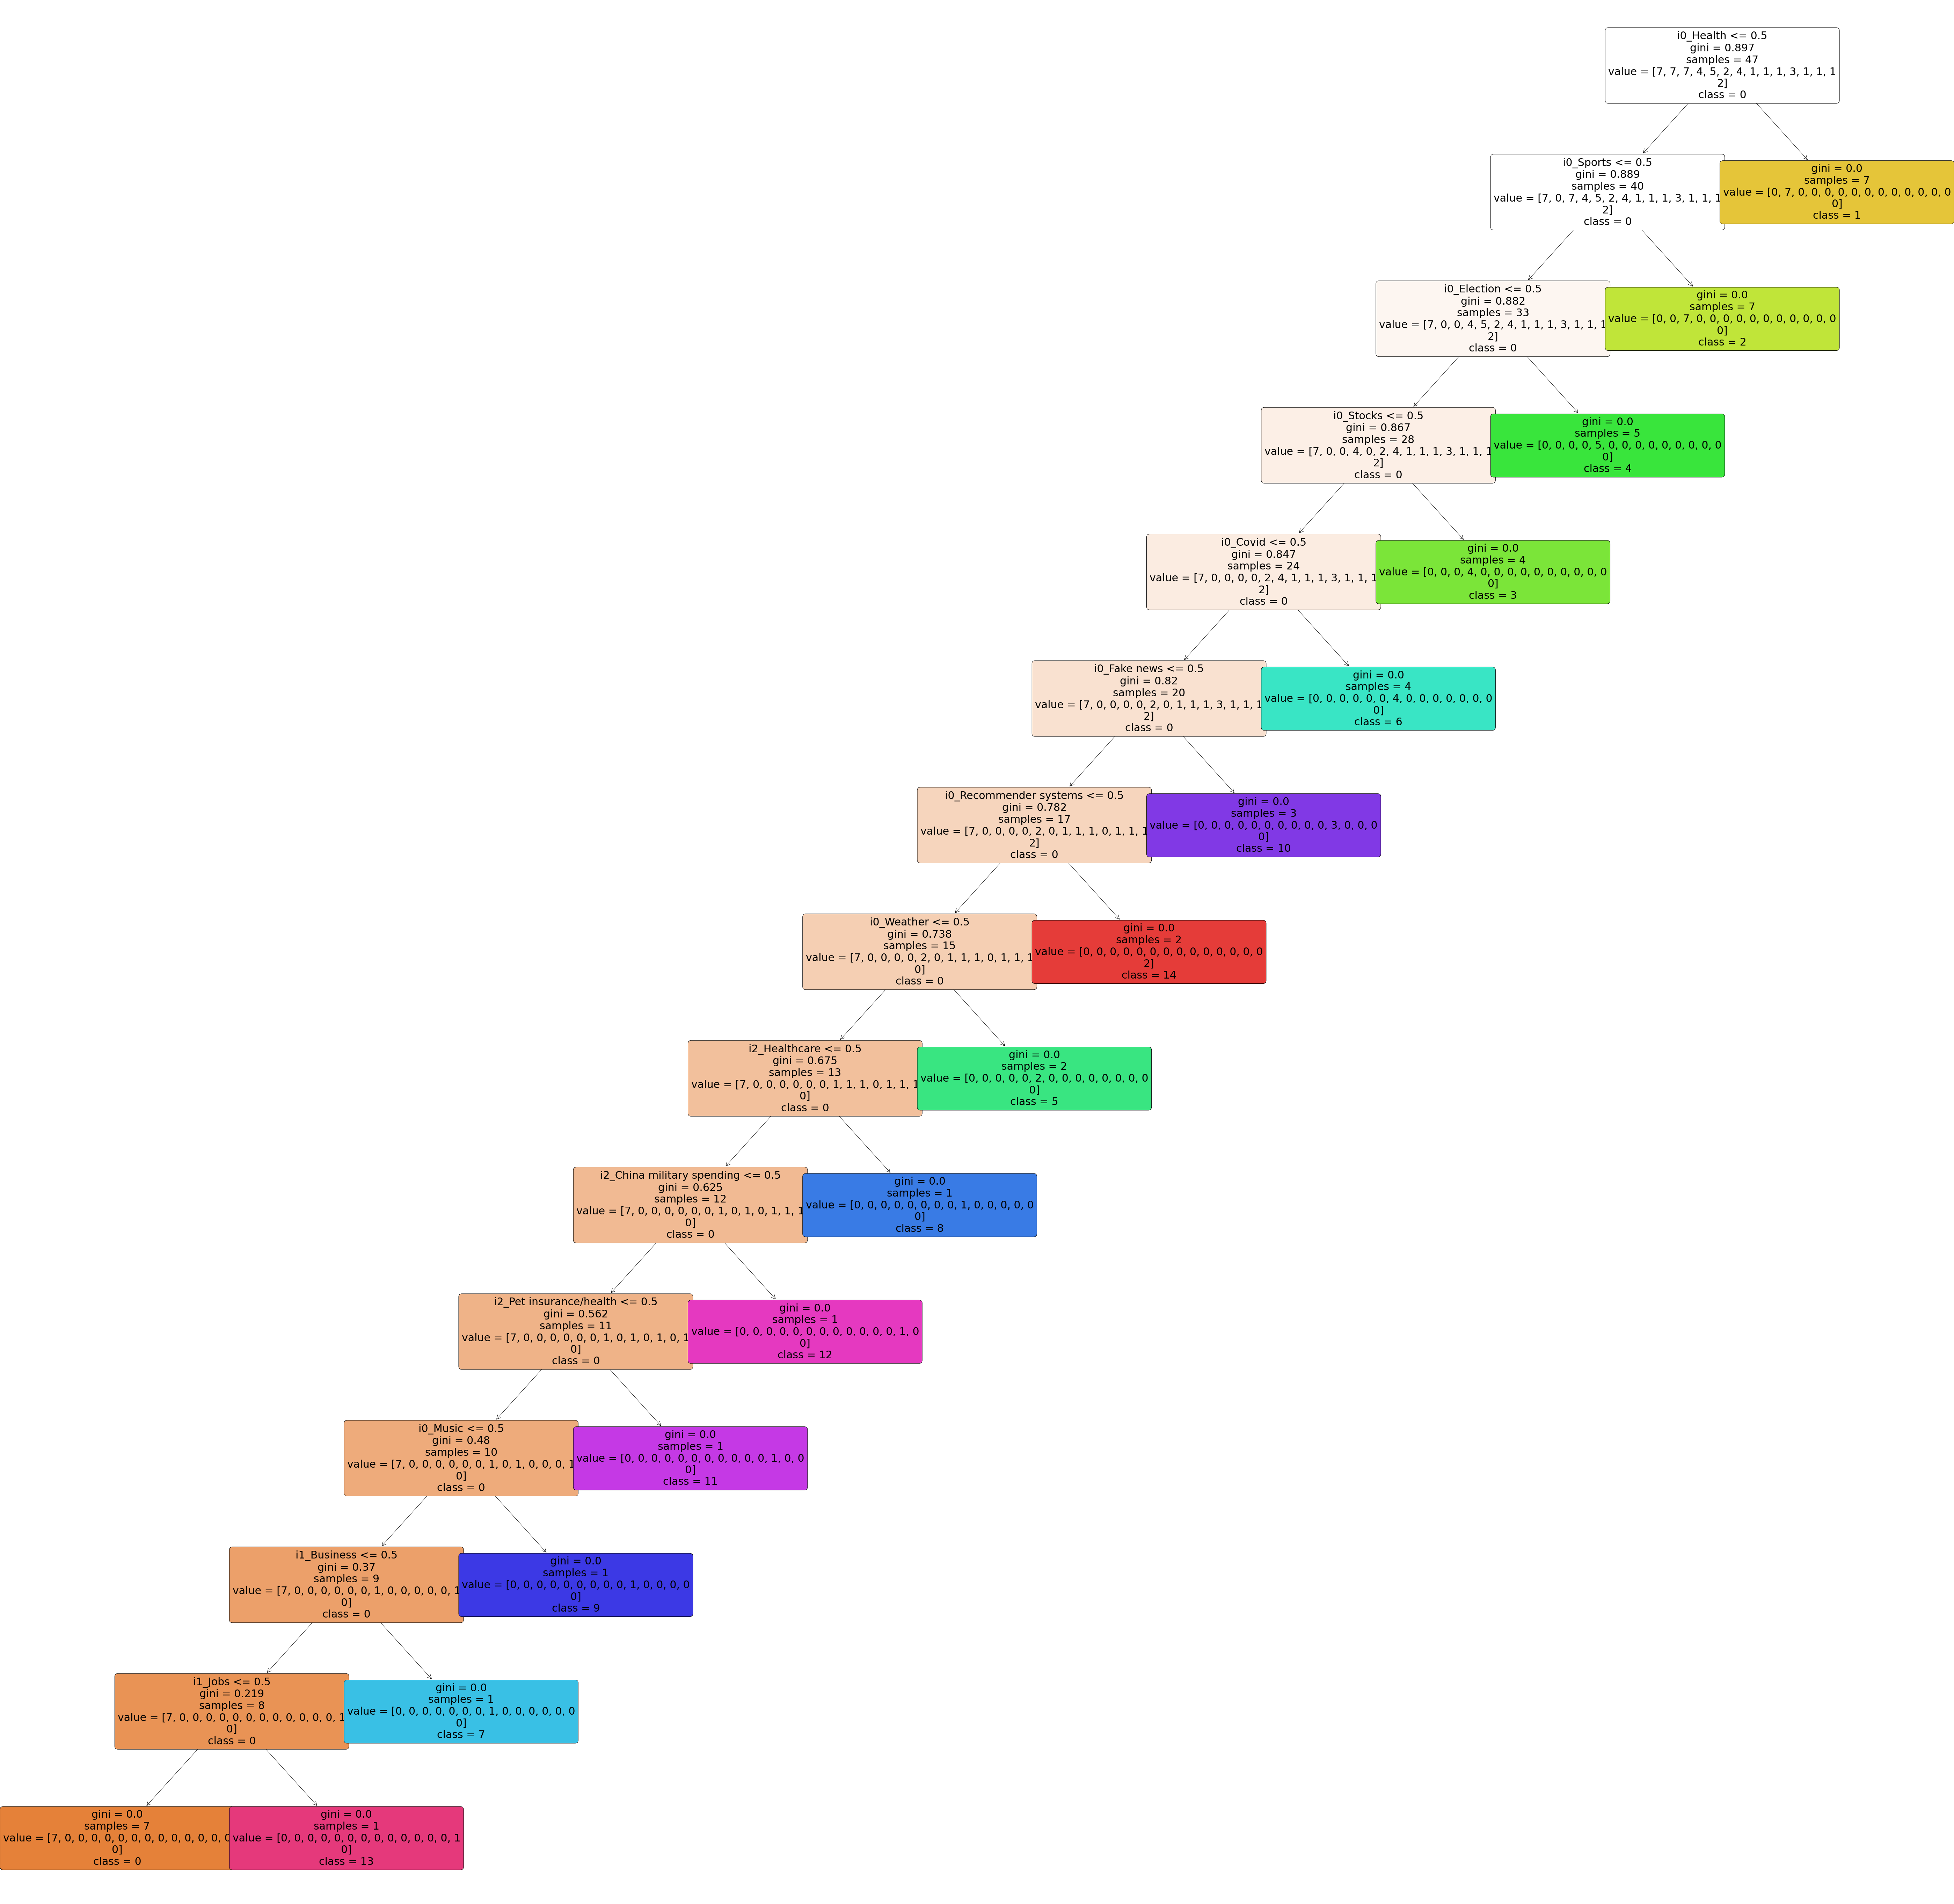

In [204]:
from pandas.plotting import scatter_matrix
#x = tree.plot_tree(clf,feature_names=features,class_names=labels.astype(str),rounded=True,filled=True) 
x = tree.plot_tree(clf,rounded=True,filled=True,class_names=sorted,feature_names=features,fontsize=30) 


In [55]:
# from mlxtend.preprocessing import TransactionEncoder

# dataset = dataset.values.tolist()
# #print(data)
# te = TransactionEncoder()
# te_ary = te.fit(dataset).transform(dataset)
# df = pd.DataFrame(te_ary, columns=te.columns_)
# df

In [56]:
# from mlxtend.frequent_patterns import apriori

# frequent = apriori(df, min_support=0.01, use_colnames=True)
# from mlxtend.frequent_patterns import association_rules
# #pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 20)

# rules = association_rules(frequent, metric="confidence", min_threshold=0.9)
# rules.sort_values(by=['antecedents','support','antecedent support'],ascending=False)

In [150]:
# #one hot encode
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')
# dataset = enc.fit(dataset)
# enc.categories_
# enc.transform(dataset)